# Welcome  

Notebook Author: Samuel Alter  
Notebook Subject: Capstone Project - Preprocess Imagery

BrainStation Winter 2023: Data Science

This notebook is for viewing satellite imagery and preprocessing it into chunks for modelling.

In [ ]:
# imports

import numpy as np
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt

In [ ]:
products_gdf = api.to_geodataframe(products)
products_gdf_sorted = products_gdf.sort_values(['cloudcoverpercentage'], ascending=[True])
products_gdf_sorted
products_gdf

In [ ]:
# api.download('becdf74b-fb47-4010-84f1-2c271a501266')

In [ ]:
import rasterio

R10 = '/Users/sra/Files/brainstation_2023_ds_capstone/brainstation_2023_ds_capstone/01_capstone_data/notebooks/S2A_MSIL2A_20221224T183801_N0509_R027_T11SLT_20221224T213852.SAFE/GRANULE/L2A_T11SLT_A039206_20221224T184116/IMG_DATA/R10m'
b4 = rio.open(R10+'/T11SLT_20221224T183801_B04_10m.jp2')
b3 = rio.open(R10+'/T11SLT_20221224T183801_B03_10m.jp2')
b2 = rio.open(R10+'/T11SLT_20221224T183801_B02_10m.jp2')


# Create an RGB image 
with rio.open('RGB.tiff','w',driver='Gtiff', width=b4.width, height=b4.height, 
              count=3,crs=b4.crs,transform=b4.transform, dtype=b4.dtypes[0]) as rgb:
    rgb.write(b2.read(1),1) 
    rgb.write(b3.read(1),2) 
    rgb.write(b4.read(1),3) 
    rgb.close()

# Clip raster to polygon

In [ ]:
import shapely

In [ ]:
shapely.geos.geos_version

In [ ]:
# first, merge perimeters
# https://stackoverflow.com/questions/61035170/merging-polygon-shapefiles-in-python

# this was done in QGIS for now. View merged perimeters, 
# to confirm only one polygon in the dataset
sm_perim_merge=gpd.read_file('/Users/sra/Desktop/Data_Science_2023/_capstone/00_capstone_data/shapefiles/perimeters_sm/santa_monica_fire_perimeters_le2018_merge.geojson')
sm_perim_merge

In [ ]:
# get coordinates from geometry of sm_perim_merge

sm_perim_merge['geometry']

In [ ]:
import gdal

gdal.UseExceptions()

In [ ]:
# define filenames

# raster in
rasin='/Users/sra/Desktop/Data_Science_2023/_capstone/00_capstone_data/orthoimagery/2018/ortho_2018_merge_clip.tif'
# CRS:
# Coordinate Reference System (CRS)
# Name				EPSG:26911 - NAD83 / UTM zone 11N
# Units				meters
# Method			Universal Transverse Mercator (UTM)
# Celestial body	Earth
# Reference			Static (relies on a datum which is plate-fixed)


# shapefile in
shpin='/Users/sra/Desktop/Data_Science_2023/_capstone/00_capstone_data/shapefiles/perimeters_sm/santa_monica_fire_perimeters_le2018_merge_shp.shp'
# I reprojected the shapefile to the same crs as the raster above in QGIS
# Coordinate Reference System (CRS)

# Name
# EPSG:26911 - NAD83 / UTM zone 11N
# Units
# meters
# Method
# Universal Transverse Mercator (UTM)
# Celestial body
# Earth
# Reference
# Static (relies on a datum which is plate-fixed)


# raster out
rasout='/Users/sra/Desktop/Data_Science_2023/_capstone/00_capstone_data/orthoimagery/2018/ortho_sm_fire.tif'

#                 out     in
result=gdal.Warp(rasout,rasin,cutlineDSName=shpin)

iface.addRasterLayer(rasout)

In [3]:
# https://opensourceoptions.com/blog/how-to-clip-a-raster-to-a-polygon-or-an-extent-with-python-extract-by-mask/

from osgeo import gdal

# fn_in = r"/Users/sra/Desktop/Data_Science_2023/_capstone/00_capstone_data/orthoimagery/2018/ortho_2018_merge_clip.tif"
rast_in='/Users/sra/Desktop/Data_Science_2023/_capstone/00_capstone_data/orthoimagery/2018/m_3411849_se_11_060_20180722.tif'

# fn_clip = '/Users/sra/Desktop/Data_Science_2023/_capstone/00_capstone_data/orthoimagery/2018/ortho_2018_merge_sm_fire.tif'


# fn_poly = r"path/to/polygon.gpkg"

# # gdal.Warp(fn_clip, fn_in, cutlineDSName=fn_poly, cutlineLayer='polygon', cropToCutline=True)

# # from osgeo import gdal
# # fn_in = r"..\..\course-gdal-python\data\input\USGS_one_meter_x64y486_ID_FEMAHQ_2018.tif"
# fn_in=r'/Users/sra/Desktop/Data_Science_2023/_capstone/00_capstone_data/orthoimagery/2018/ortho_2018_merge_clip.tif'

# # fn_poly = r"..\..\course-gdal-python\data\input\polygon.gpkg"
# fn_poly=r'/Users/sra/Desktop/Data_Science_2023/_capstone/00_capstone_data/shapefiles/perimeters_sm/santa_monica_fire_perimeters_le2018_merge.geojson'

# # fn_clip = '../data/output/clip_polygon.tif'
# fn_clip='/Users/sra/Desktop/Data_Science_2023/_capstone/00_capstone_data/orthoimagery/2018/ortho_2018_merge_clip_fire.tif'


# ortho_fire=gdal.Warp(fn_clip, fn_in, cutlineDSName=fn_poly, cutlineLayer='polygon', cropToCutline=True)
# ortho_fire
# # gdal.Warp(fn_clip2, fn_in, cutlineDSName=fn_poly, cutlineLayer='polygon', cropToCutline=False)
# # where = "ID = '1'"
# # gdal.Warp(fn_clip_where1, fn_in, cutlineDSName=fn_poly, cutlineLayer='polygon', cropToCutline=True, cutlineWhere=where)
# # where = "ID = '2'"
# # gdal.Warp(fn_clip_where2, fn_in, cutlineDSName=fn_poly, cutlineLayer='polygon', cropToCutline=True, cutlineWhere=where)

In [9]:
# open raster in read mode
data=rasterio.open(fp)

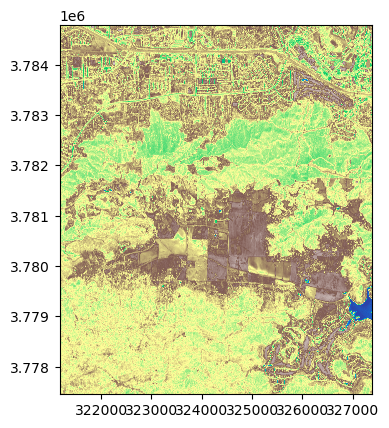

<Axes: >

In [10]:
# plot the data

show((data,4),cmap='terrain')

In [14]:
type(data)

rasterio.io.DatasetReader

In [13]:
# try to insert geometry into a geodataframe

polygon=r'/Users/sra/Desktop/Data_Science_2023/_capstone/00_capstone_data/shapefiles/santa_monica_water_bounds/sm_bounds_water_epsg26911_nad83_utm11n.geojson'

geo=gpd.GeoDataFrame({'geometry':polygon},index=[0],crs=from_epsg(4326))

/Applications/Anaconda/anaconda3/envs/gis/lib/python3.10/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/var/folders/n3/q8wb235x57n_sx2q14dsngjr0000gn/T/ipykernel_8905/3660748030.py:5: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  geo=gpd.GeoDataFrame({'geometry':polygon},index=[0],crs=from_epsg(4326))


In [15]:
# try to re-project into the same coordinate system as the raster data

geo = geo.to_crs(crs=data.crs.data)

AttributeError: 'Series' object has no attribute 'to_crs'

In [16]:
# get coordinates of the geometry in a format that rasterio wants them
def getFeatures(gdf):
    """Function to parse features from GeoDataFrame in such a manner that rasterio wants them"""
    import json
    return [json.loads(gdf.to_json())['features'][0]['geometry']]

In [17]:
coords = getFeatures(geo)
print(coords)

AttributeError: 'str' object has no attribute '__geo_interface__'

In [ ]:
# Now we are ready to clip the raster with the polygon 
# using the coords variable that we just created. 
# Clipping the raster can be done easily with the mask function 
# that we imported in the beginning from rasterio, and specifying clip=True.

out_img, out_transform = mask(raster=data, shapes=coords, crop=True)

## [Extrating Patches from Large Images and Masks for Semantic Segmentation](https://www.youtube.com/watch?v=7IL7LKSLb9I)

Following this tutorial to convert my large fire/nofire images into patches for neural network analysis. The code block below is from this video, with some alterations to adapt it to my use case.

In [41]:
import numpy as np
from matplotlib import pyplot as plt
from patchify import patchify
import tifffile as tiff

# large_image_stack_fire=tiff.imread('/Users/sra/Desktop/Data_Science_2023/_capstone/00_capstone_data/orthoimagery/2018/ortho_2018_sm_fire.tif')

large_image_stack_test=tiff.imread('/Users/sra/Desktop/Data_Science_2023/_capstone/00_capstone_data/orthoimagery/2018/m_3411849_se_11_060_20180722.tif')

In [40]:
# updated 
# https://stackoverflow.com/questions/68224588/problem-when-using-patchify-library-to-create-patches

import cv2

# read large_image_stack_test
img = cv2.imread('/Users/sra/Desktop/Data_Science_2023/_capstone/00_capstone_data/orthoimagery/2018/m_3411849_se_11_060_20180722.tif')
# type(img)
# arr_shape=np.array(img.shape)
# print(arr_shape)
# window_shape=np.array((128,128,3))
# print(window_shape)
patches_img = patchify(img, (128,128,3), step=128)

for i in range(patches_img.shape[0]):
    for j in range(patches_img.shape[1]):
        single_patch_img = patches_img[i, j, 0, :, :, :]
        if not cv2.imwrite('/Users/sra/Desktop/Data_Science_2023/_capstone/00_capstone_data/orthoimagery/2018/fire_patches' + 'image_' + '_'+ str(i)+str(j)+'.jpg', single_patch_img):
            raise Exception("Could not write the image")